In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

import warnings
warnings.filterwarnings("ignore", category=FutureWarning, module="seaborn")

df = pd.DataFrame()
file_paths = [f'dds_ch2_nyt/nyt{i}.csv' for i in range(1, 32)]
data_frames = [pd.read_csv(file) for file in file_paths]

df = pd.concat(data_frames, ignore_index=True)

df

,Age,Gender,Impressions,Clicks,Signed_In
0,36,0,3,0,1
1,73,1,3,0,1
2,30,0,3,0,1
3,49,1,3,0,1
4,47,1,11,0,1
...,...,...,...,...,...
14905860,41,1,4,0,1
14905861,0,0,5,0,0
14905862,22,1,3,0,1
14905863,59,0,5,1,1


In [2]:
age_categories = {
    '<18': [0, 17],
    '18-24': [18, 24],
    '25-34': [25, 34],
    '35-44': [35, 44],
    '45-54': [45, 54],
    '55-64': [55, 64],
    '65+': [65, float('inf')]
}

def categorize_age(age):
    for category, (lower, upper) in age_categories.items():
        if lower <= age <= upper:
            return category

df['age_category'] = df['Age'].apply(categorize_age)

user_age_counts = df['age_category'].value_counts()

user_age_counts
df

,Age,Gender,Impressions,Clicks,Signed_In,age_category
0,36,0,3,0,1,35-44
1,73,1,3,0,1,65+
2,30,0,3,0,1,25-34
3,49,1,3,0,1,45-54
4,47,1,11,0,1,45-54
...,...,...,...,...,...,...
14905860,41,1,4,0,1,35-44
14905861,0,0,5,0,0,<18
14905862,22,1,3,0,1,18-24
14905863,59,0,5,1,1,55-64


РЕЗУЛЬТАТ: Отримуємо дані, де кожен користувач відповідає певній віковій категорії.

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14905865 entries, 0 to 14905864
Data columns (total 6 columns):
 #   Column        Dtype 
---  ------        ----- 
 0   Age           int64 
 1   Gender        int64 
 2   Impressions   int64 
 3   Clicks        int64 
 4   Signed_In     int64 
 5   age_category  object
dtypes: int64(5), object(1)
memory usage: 682.3+ MB


In [4]:
df.isna().sum()

Age             0
Gender          0
Impressions     0
Clicks          0
Signed_In       0
age_category    0
dtype: int64

In [5]:
df.groupby('Signed_In')['Age'].describe()

,count,mean,std,min,25%,50%,75%,max
Signed_In,,,,,,,,
0,5613610.0,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0
1,9292255.0,42.096068,16.327006,3.0,29.0,41.0,53.0,115.0


In [6]:
df[df["Signed_In"] == 0].groupby('Gender').size()

Gender
0    5613610
dtype: int64

РЕЗУЛЬТАТ: Отримуємо те, що усі неавторизовані люди рахуються як жінки за статтю

In [7]:
df[df["Signed_In"] == 0].groupby('Age').size()

Age
0    5613610
dtype: int64

РЕЗУЛЬТАТ: Також було з'ясовано, що неавторизовані користувачі мають вік 0, відповідно це потрібно буде врахувати при аналізі даних за віком

In [8]:
df_copy = df.copy(deep = True)
df_copy = df_copy[(df_copy['Age'] > 0) & (df_copy['Signed_In'] == 1)]

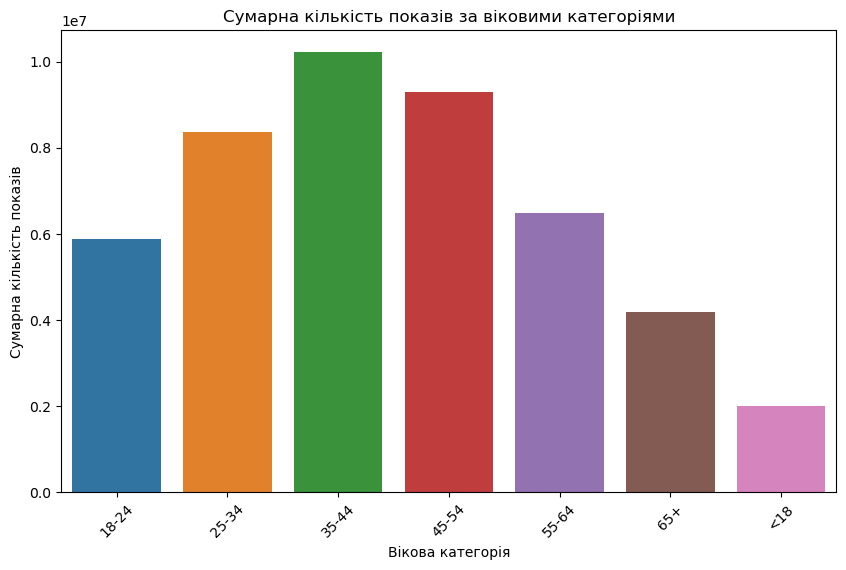

In [9]:
age_grouped = df_copy.groupby('age_category')['Impressions'].sum().reset_index()

plt.figure(figsize=(10, 6))
sns.barplot(x='age_category', y='Impressions', data=age_grouped)
plt.title('Сумарна кількість показів за віковими категоріями')
plt.xlabel('Вікова категорія')
plt.ylabel('Сумарна кількість показів')
plt.xticks(rotation=45)
plt.show()

РЕЗУЛЬТАТ: 
Найчастіше оголошення з'являються у віковій категорії 25-35, 35-44, 45-54. Рідше оголошення з'являються у людей 18-24, 55-64 і найгірші у людей похилого віку (65+), та молодших 18.

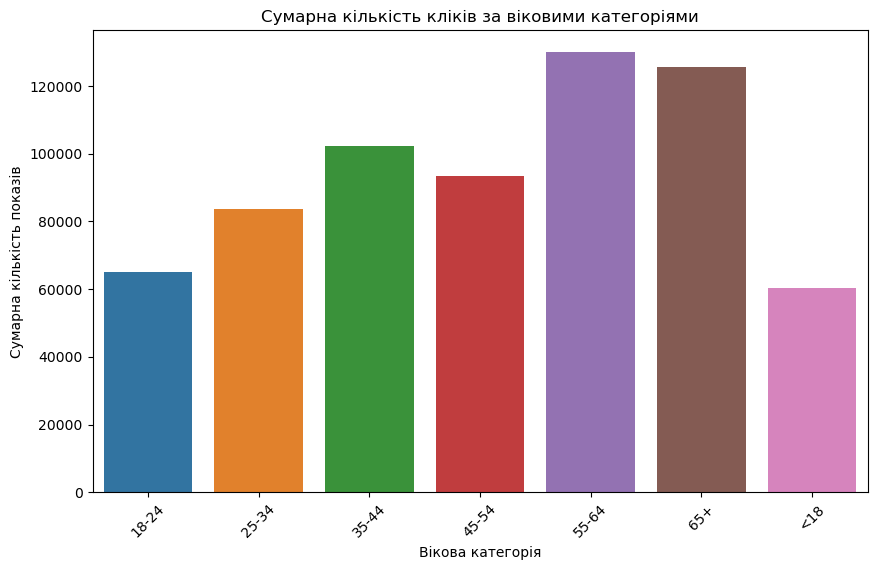

In [10]:
age_grouped = df_copy.groupby('age_category')['Clicks'].sum().reset_index()

plt.figure(figsize=(10, 6))
sns.barplot(x='age_category', y='Clicks', data=age_grouped)
plt.title('Сумарна кількість кліків за віковими категоріями')
plt.xlabel('Вікова категорія')
plt.ylabel('Сумарна кількість показів')
plt.xticks(rotation=45)
plt.show()

РЕЗУЛЬТАТ: 
Найвищі показники переходів у віковій категорії 55-64, 65+. Менше переходять люди 25-54, найгірші показники у людей до 24 років.

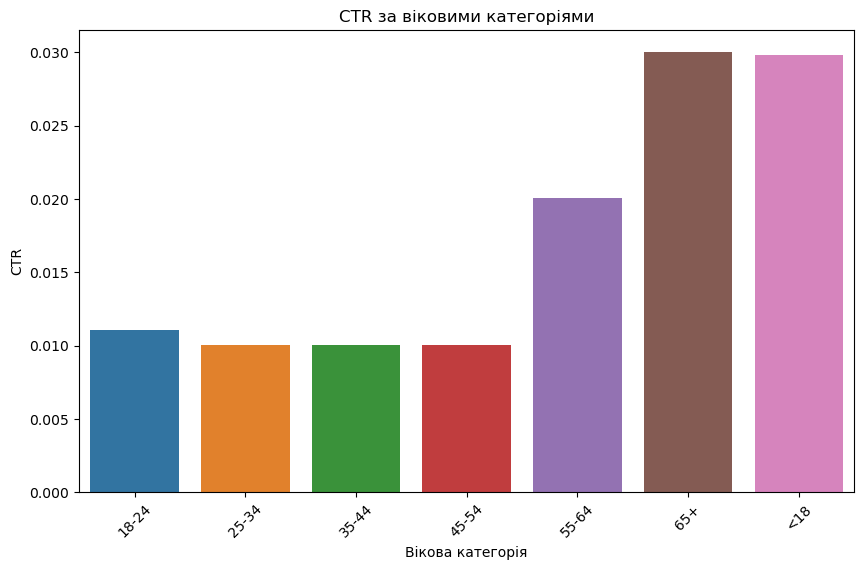

,Age,Gender,Impressions,Clicks,Signed_In,age_category,CTR
0,36,0,3,0,1,35-44,0.0
1,73,1,3,0,1,65+,0.0
2,30,0,3,0,1,25-34,0.0
3,49,1,3,0,1,45-54,0.0
4,47,1,11,0,1,45-54,0.0
...,...,...,...,...,...,...,...
14905859,18,0,4,0,1,18-24,0.0
14905860,41,1,4,0,1,35-44,0.0
14905862,22,1,3,0,1,18-24,0.0
14905863,59,0,5,1,1,55-64,0.2


In [11]:
df_copy['CTR'] = df_copy['Clicks'] / df_copy['Impressions'] 
age_grouped = df_copy.groupby('age_category')['CTR'].mean().reset_index()

plt.figure(figsize=(10, 6))
sns.barplot(x='age_category', y='CTR', data=age_grouped)
plt.title('CTR за віковими категоріями')
plt.xlabel('Вікова категорія')
plt.ylabel('CTR')
plt.xticks(rotation=45)
plt.show()

df_copy

РЕЗУЛЬТАТ: 
Не зважаючи на те, що по попередніх графіках показники людей молодших за 18 були найгірші, вони є однією з двох найбільш зацікавлених категорією людей, на першому місці люди старші за 65 та на третьому 55-64. 

Найменш зацікавленими в оголошеннях виявилися люди у вік яких становить у мешах 18-54 років. 

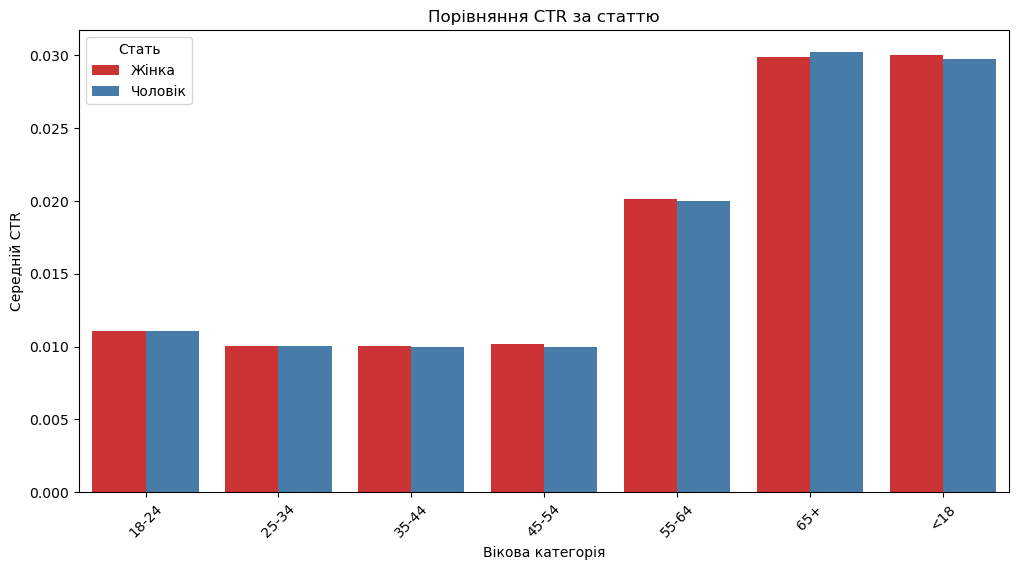

In [12]:
gender_age_grouped = df_copy[(df_copy['Age'] > 0)].groupby(['Gender', 'age_category', 'Signed_In'])['CTR'].mean().reset_index()
gender_age_grouped['Gender'] = gender_age_grouped['Gender'].replace({0: 'Жінка', 1: 'Чоловік'})

plt.figure(figsize=(12, 6))
sns.barplot(x='age_category', y='CTR', hue='Gender', data=gender_age_grouped, palette='Set1')
plt.title('Порівняння CTR за статтю')
plt.xlabel('Вікова категорія')
plt.ylabel('Середній CTR')
plt.xticks(rotation=45)
plt.legend(title='Стать', loc=2)
plt.show()

РЕЗУЛЬТАТ: Стать користувача не має суттєвого впливу на показники середнього СTR по чоловікам та жінкам.

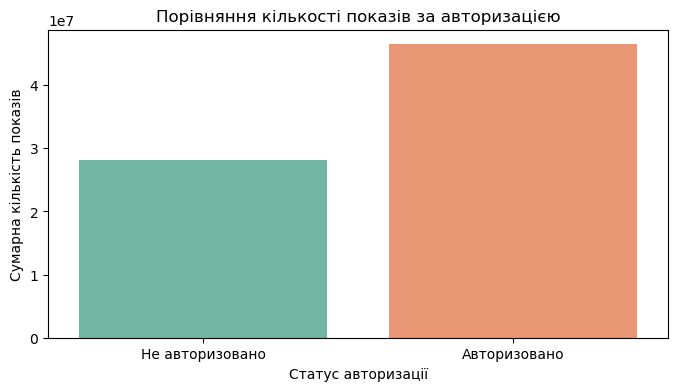

In [13]:
authorization_grouped = df.groupby('Signed_In')['Impressions'].sum().reset_index()
authorization_grouped['Signed_In'] = authorization_grouped['Signed_In'].replace({0: 'Не авторизовано', 1: 'Авторизовано'})

plt.figure(figsize=(8, 4))
sns.barplot(x='Signed_In', y='Impressions', data=authorization_grouped, palette='Set2')
plt.title('Порівняння кількості показів за авторизацією')
plt.xlabel('Статус авторизації')
plt.ylabel('Сумарна кількість показів')
plt.show()

РЕЗУЛЬТАТ: Кількість авторизованих користувачів майже вдвічі більша за кількість не авторизованих.

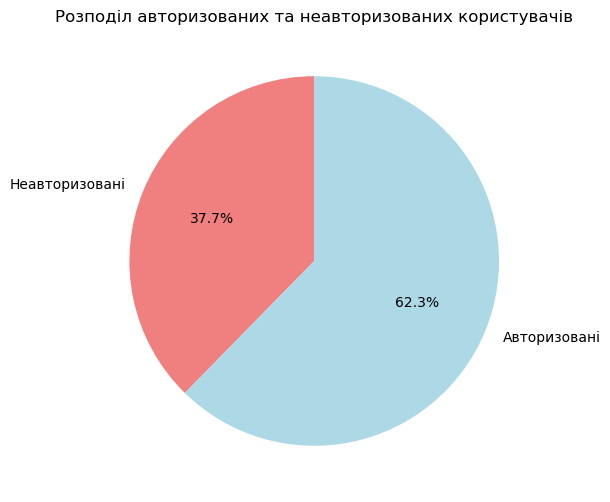

In [14]:
authorization_grouped = df.groupby('Signed_In')['Age'].count()

plt.figure(figsize=(6, 6))
plt.pie(authorization_grouped, labels=['Неавторизовані', 'Авторизовані'], autopct='%1.1f%%', startangle=90, colors=['lightcoral', 'lightblue'])
plt.title('Розподіл авторизованих та неавторизованих користувачів')
plt.show()

Відповідні показники авторизованих та не авторизованих користувачів у відсотковому відношенні.

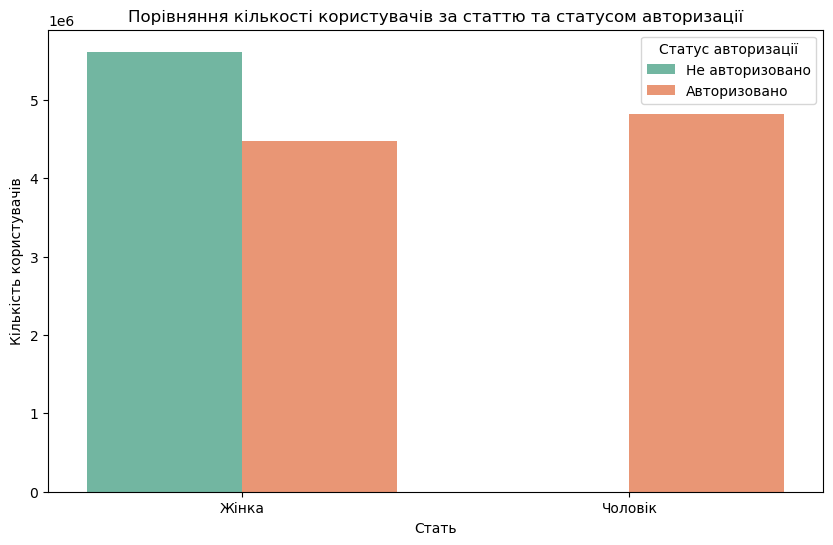

In [15]:
gender_authorization_grouped = df.groupby(['Gender', 'Signed_In'])['Age'].count().reset_index()

gender_authorization_grouped['Signed_In'] = gender_authorization_grouped['Signed_In'].replace({0: 'Не авторизовано', 1: 'Авторизовано'})
gender_authorization_grouped['Gender'] = gender_authorization_grouped['Gender'].replace({0: 'Жінка', 1: 'Чоловік'})

plt.figure(figsize=(10, 6))
sns.barplot(x='Gender', y='Age', hue='Signed_In', data=gender_authorization_grouped, palette='Set2')
plt.title('Порівняння кількості користувачів за статтю та статусом авторизації')
plt.xlabel('Стать')
plt.ylabel('Кількість користувачів')
plt.legend(title='Статус авторизації', loc='upper right')
plt.show()

РЕЗУЛЬТАТ: Можна помітити, що серед  не авторизованих користувачів немає чоловіків, яких авторизованих більше. Це може свідчити, що система визначає не авторизованих користувачів як жінок.

In [16]:
df_copy = df.copy(deep = True)
df_copy = df_copy.drop('age_category', axis = 1)
df_copy.corr()

,Age,Gender,Impressions,Clicks,Signed_In
Age,1.000000,0.418021,-0.000516,-0.069204,0.845325
Gender,0.418021,1.000000,-0.000712,-0.060767,0.536957
Impressions,-0.000516,-0.000712,1.000000,0.137056,-0.000579
Clicks,-0.069204,-0.060767,0.137056,1.000000,-0.107565
Signed_In,0.845325,0.536957,-0.000579,-0.107565,1.000000


In [17]:
df['Gender'].replace({0: 'Female', 1: 'Male'}, inplace=True)
grouped = df.groupby(['age_category', 'Gender'])

In [18]:
result_table = grouped['Age'].describe().unstack()
result_table = result_table.drop('count', axis=1)

impressions_clicks = df.groupby('age_category')[['Impressions', 'Clicks']].sum()
impressions_clicks['CTR'] = impressions_clicks['Clicks'] / impressions_clicks['Impressions']

var = grouped['Age'].var().unstack()
result_table = pd.concat([result_table, var, impressions_clicks], axis = 1)
result_table.columns = ['Cереднє жінок', 'Cереднє чоловіків', 'Стандартне відхилення жінок', 'Стандартне відхилення чоловіків',
                        'Мін. вік жінок', 'Мін. вік чоловіків', 'Квантиль 25 жінок', 'Квантиль 25 чоловіків',
                        'Медіана жінок', 'Медіана чоловіків', 'Квантиль 75 жінок', 'Квантиль 75 чоловіків',
                        'Макс. вік жінок', 'Макс. вік чоловіків', 'Дисперсія віку жінок', 'Дисперсія віку чоловіків',
                        'Impressions', 'Clicks', 'CTR']
result_table

,Cереднє жінок,Cереднє чоловіків,Стандартне відхилення жінок,Стандартне відхилення чоловіків,Мін. вік жінок,Мін. вік чоловіків,Квантиль 25 жінок,Квантиль 25 чоловіків,Медіана жінок,Медіана чоловіків,Квантиль 75 жінок,Квантиль 75 чоловіків,Макс. вік жінок,Макс. вік чоловіків,Дисперсія віку жінок,Дисперсія віку чоловіків,Impressions,Clicks,CTR
age_category,,,,,,,,,,,,,,,,,,,
18-24,20.843712,20.843199,1.855472,1.856100,18.0,18.0,19.0,19.0,21.0,21.0,22.0,22.0,24.0,24.0,3.442777,3.445107,5881141,65058,0.011062
25-34,29.499859,29.499361,2.628644,2.629826,25.0,25.0,27.0,27.0,30.0,30.0,32.0,32.0,34.0,34.0,6.909771,6.915984,8365147,83791,0.010017
35-44,39.501446,39.496827,2.630214,2.631012,35.0,35.0,37.0,37.0,40.0,39.0,42.0,42.0,44.0,44.0,6.918028,6.922222,10218789,102379,0.010019
45-54,49.496833,49.500766,2.628625,2.627262,45.0,45.0,47.0,47.0,49.0,50.0,52.0,52.0,54.0,54.0,6.909671,6.902506,9290811,93400,0.010053
55-64,59.498704,59.500510,2.629597,2.627768,55.0,55.0,57.0,57.0,59.0,60.0,62.0,62.0,64.0,64.0,6.914780,6.905166,6494207,129968,0.020013
65+,73.058069,72.841908,6.022420,6.101112,65.0,65.0,68.0,68.0,72.0,72.0,77.0,76.0,115.0,112.0,36.269539,37.223569,4182151,125516,0.030012
<18,0.340167,15.258035,2.267073,1.707958,0.0,3.0,0.0,14.0,0.0,16.0,0.0,17.0,17.0,17.0,5.139621,2.917122,30089822,856656,0.028470
